<h1 style='text-align: center;background: black;color: white;border-radius: 10px; padding: 20px'>
    Titanic Survival Prediction (Ensemble Modeling)
</h1>

<div style='background: black;color: white;border-radius: 10px; padding: 20px'>
    <h1>Easy Navigation</h1>
    <ul>
        <li><h3><a href='#0'>0- Intro</a></h3></li>
        <li><h3><a href='#1'>1- Data preprocessing</a></h3></li>
        <li>
            <h3><a href='#2'>2- Data exploration and visualization</a></h3>
            <ul>
                <li><h4><a href='#2-1'>2.1- Data  visualization</a></h4></li>
                <li><h4><a href='#2-2'>2.2-  Explanatory Data Analysis (EDA)</a></h4></li>
            </ul>
        </li>
        <li>
            <h3><a href='#3'>3- Feature Engineering</a></h3>
            <ul>
                <li><h4><a href='#3-1'>3.1- Feauture creation</a></h4></li>
                <li><h4><a href='#3-2'>3.2-  Encoding categorical features</a></h4></li>
            </ul>
        </li>
        <li>
            <h3><a href='#4'>4- Modeling</a></h3>
            <ul>
                <li><h4><a href='#4-1'>4.1- Simple modeling</a></h4></li>
                <li><h4><a href='#4-2'>4.2- Ensemble modeling</a></h4></li>
            </ul>
        </li>
        <li>
            <h3><a href='#5'>5- Prediction and submission</a></h3>
        </li>
    </ul>
</div>

In [1]:
# import required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as plot
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data
train_df = pd.read_csv('/kaggle/input/titanic/train.csv', index_col=0)
test_df = pd.read_csv('/kaggle/input/titanic/test.csv', index_col=0)

<a id='0'></a>
<h2 style='text-align: center;background: black;color: white; padding: 15px;border: 2px solid'>
    0- Intro</h2>

In [3]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# columns
np.array(train_df.columns).reshape(-1, 1)

array([['Survived'],
       ['Pclass'],
       ['Name'],
       ['Sex'],
       ['Age'],
       ['SibSp'],
       ['Parch'],
       ['Ticket'],
       ['Fare'],
       ['Cabin'],
       ['Embarked']], dtype=object)

In [5]:
train_df.shape

(891, 11)

The dataset contains **891** observatoins (rows) and **11** features (columns)

In [6]:
# data types
train_df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


There is not any inappropriate data types

<a id='1'></a>
<h2 style='text-align: center;background: black;color: white;border-radius: 10px; padding: 15px'>
    1- Data preprocessing</h2>

<h3 style='text-align: center;background: black;color: white;border-radius: 10px; padding: 10px'>
    1.1- Handling Missing Values
</h3>

In [8]:
# missing values
train_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

There are some missing values in 'Age' and 'Cabin' and 'Embarked' columns

In [9]:
# remove Cabin since it has too many missing values
train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)


In [10]:
# see if there is any patterns for the NaN values for Age
train_df[train_df.isnull().any(axis=1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S


From the above chart, we can conclude that the missing values are completely at random(CAR). 

In [11]:
train_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

The mean and the median are quite the same, so we can use any of them to fill the NaN values

In [12]:
# fill the missing values with the median
train_df['Age'].fillna(value=train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(value=test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(value=test_df['Fare'].median(), inplace=True)

In [13]:
train_df[train_df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [14]:
# fill the 'Embarked' missing values with its mode
train_df['Embarked'].fillna(value=train_df['Embarked'].mode()[0], inplace=True)

In [15]:
train_df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

No more missing values...

<a id='2'></a>
<h1 style='text-align: center;background: black;color: white;border-radius: 10px; padding: 15px;'>
    2- Data exploration and visualization</h1>

### Summary of nummeric features

In [16]:
train_df.iloc[:, 1:].describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# let's look at 'Fare'
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [18]:
# summary of categorical values
train_df.iloc[:, 1:].describe(include='object').T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Embarked,891,3,S,646


<a id='2-1'></a>
<h3 style='text-align: center;background: black;color: white;border-radius: 10px; padding: 10px'>
    2.1- Data Visualizations
</h3>

Text(0.5, 1.0, 'Survival Counts')

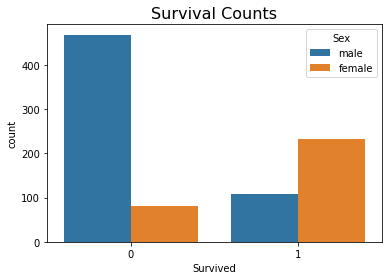

In [19]:
# Survial counts
ax = sns.countplot(data=train_df, x='Survived', hue='Sex')
ax.set_title('Survival Counts', fontdict={'fontsize':16})

The fraction of male passengers who survived is far fewer than than that of the female. when evaquating, women mihgt have been in priority. 

Text(0.5, 1.0, 'Age distribution')

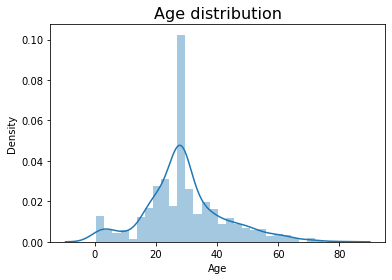

In [20]:
# how Ages are distributed
ax = sns.distplot(train_df['Age'])
ax.set_title('Age distribution', fontdict={'fontsize':16})


Most of the passengers are 25-35 years old.

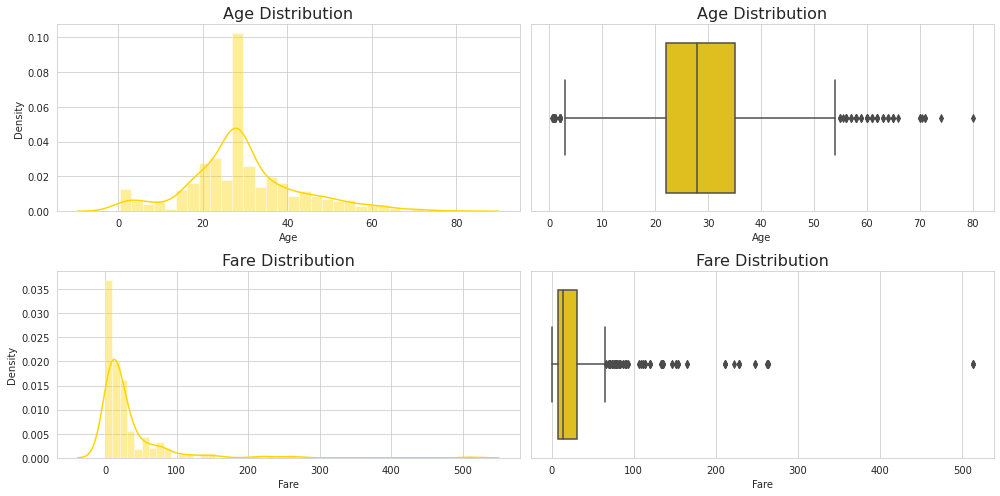

In [21]:
# PLot Age and Fare distributions

plt.figure(figsize=(14,7))
sns.set_style('whitegrid')
sns.set_palette('hsv')

plt.subplot(2,2,1)
ax = sns.distplot(train_df['Age'])
ax.set_title('Age Distribution', fontdict={'fontsize':16})
plt.subplot(2,2,2)
ax = sns.boxplot(train_df['Age'])
ax.set_title('Age Distribution', fontdict={'fontsize':16})

plt.subplot(2,2,3)
ax = sns.distplot(train_df['Fare'])
ax.set_title('Fare Distribution', fontdict={'fontsize':16})
plt.subplot(2,2,4)
ax = sns.boxplot(train_df['Fare'])
ax.set_title('Fare Distribution', fontdict={'fontsize':16})
plt.tight_layout()
plt.show()

There are some outliers in 'Fare' feature of which will be taken care in the following cell.

In [22]:
# Replace the values of Fare greater than or equal to 200 to 200 (train and test sets)
train_df['Fare'].replace(train_df['Fare'][train_df['Fare'] >= 200].values, 200, inplace=True)

test_df['Fare'].replace(test_df['Fare'][test_df['Fare'] >= 200].values, 200, inplace=True)

plot the above again and see the difference

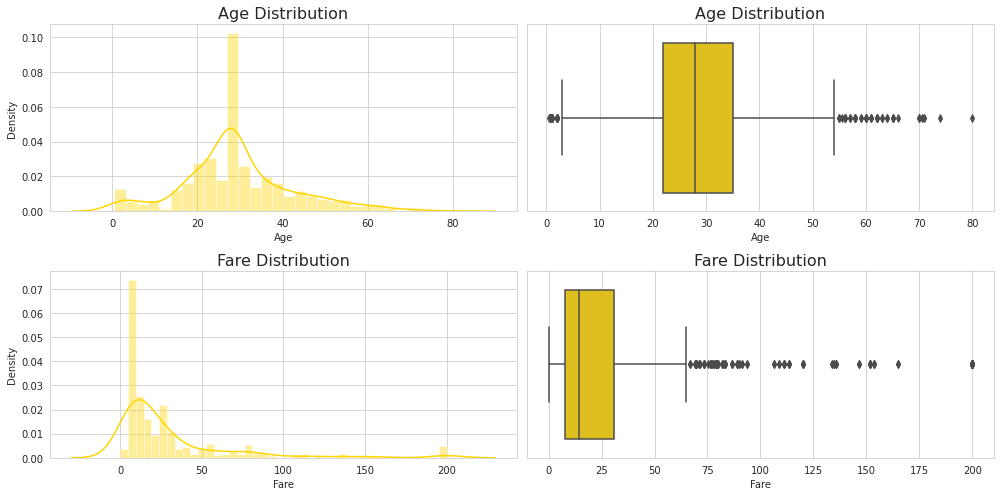

In [23]:
# PLot Age and Fare distributions

plt.figure(figsize=(14,7))

plt.subplot(2,2,1)
ax = sns.distplot(train_df['Age'])
ax.set_title('Age Distribution', fontdict={'fontsize':16})

plt.subplot(2,2,2)
ax = sns.boxplot(train_df['Age'])
ax.set_title('Age Distribution', fontdict={'fontsize':16})

plt.subplot(2,2,3)
ax = sns.distplot(train_df['Fare'])
ax.set_title('Fare Distribution', fontdict={'fontsize':16})

plt.subplot(2,2,4)
ax = sns.boxplot(train_df['Fare'])
ax.set_title('Fare Distribution', fontdict={'fontsize':16})

plt.tight_layout()
plt.show()

In [24]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

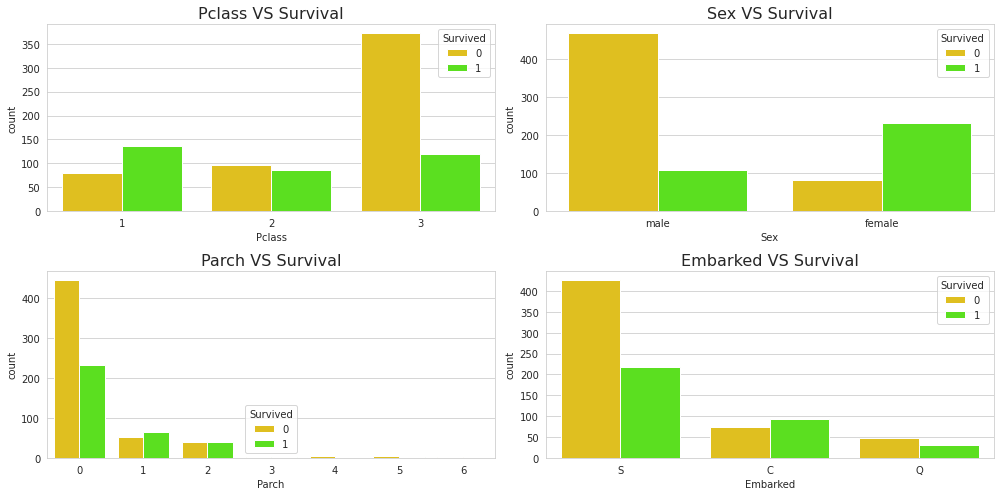

In [25]:
# different categorical variables versus survival

plt.figure(figsize=(14,7))
sns.set_palette('hsv')

plt.subplot(2,2,1)
ax = sns.countplot(train_df['Pclass'], hue=train_df['Survived'])
ax.set_title('Pclass VS Survival', fontdict={'fontsize':16})
plt.subplot(2,2,2)
ax = sns.countplot(train_df['Sex'], hue=train_df['Survived'])
ax.set_title('Sex VS Survival', fontdict={'fontsize':16})

plt.subplot(2,2,3)
ax = sns.countplot(train_df['Parch'], hue=train_df['Survived'])
ax.set_title('Parch VS Survival', fontdict={'fontsize':16})
plt.subplot(2,2,4)
ax = sns.countplot(train_df['Embarked'], hue=train_df['Survived'])
ax.set_title('Embarked VS Survival', fontdict={'fontsize':16})

plt.tight_layout()
plt.show()

Inferences:
- **Pclass**: Those with a Pclass of '1' has the greatest survival fraction, those with a Pclass of '3' has the lowest survival fraction, and Pclass '2' lies somewhere in between.
- **Sex**: Obviously, female passengers' survival rate is greater than male passengers. Women might have been in priority when evacuating.
- **Parch**: Those with no parents or children has more tendency to die.
- **Embarked**: Those with a 'C' has the greatest survival fraction, those with an 'S' has the lowest survival fraction, and the 'Q' lies somewhere in between.

Text(0.5, 1.0, 'Fare VS Survival')

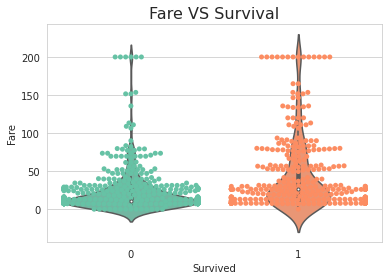

In [26]:
# survival vs fare
sns.set_palette('Set2')
ax = sns.swarmplot(data=train_df, x='Survived', y='Fare')
sns.violinplot(data=train_df, x='Survived', y='Fare', ax=ax)
ax.set_title('Fare VS Survival', fontdict={'fontsize':16})

The average Fare of those who survived is greater than those who died.

Text(0.5, 1.0, 'Fare vs Age')

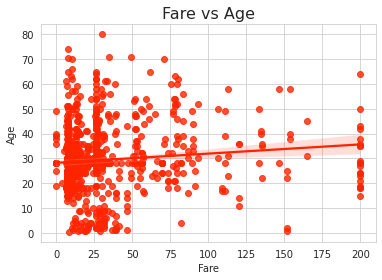

In [27]:
# 'Age' VS 'Fare'
sns.set_palette('autumn')
ax = sns.regplot(data=train_df, x='Fare', y='Age')
ax.set_title('Fare vs Age', fontdict={'fontsize':16})

It seems that there is not any specific relationship between the passengers' ages and fares.

<AxesSubplot:>

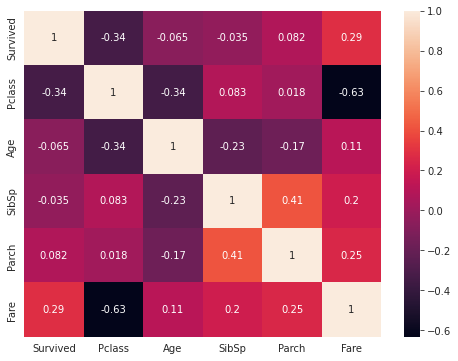

In [28]:
# heatmap of correlation between nummeric features
plt.figure(figsize=(8, 6))
sns.heatmap(train_df.corr(), annot=True)

<a id='2-2'></a>
<h3 style='text-align: center;background: black;color: white;border-radius: 15px; padding: 10px;'>
    2.2- Explanatory Data Analysis
</h3>

In [29]:
pd.crosstab(
    index=train_df['Sex'],
    columns='Count'
)

col_0,Count
Sex,
female,314
male,577


In [30]:
pd.crosstab(
    index=train_df['Sex'],
    columns=train_df['Survived'],
    margins=True
)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [31]:
pd.crosstab(
    index=train_df['Sex'],
    columns=train_df['Survived'],
    margins=True,
    normalize='index'
)

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908
All,0.616162,0.383838


In [32]:
pd.crosstab(
    index=train_df['Sex'],
    columns=train_df['Survived'],
    margins=True,
    normalize=True
)

Survived,0,1,All
Sex,,,
female,0.090909,0.261504,0.352413
male,0.525253,0.122334,0.647587
All,0.616162,0.383838,1.000000


In [33]:
train_df.corr()['Survived']

Survived    1.000000
Pclass     -0.338481
Age        -0.064910
SibSp      -0.035322
Parch       0.081629
Fare        0.285544
Name: Survived, dtype: float64

In [34]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<a id='3'></a>
<h2 style='text-align: center;background: black;color: white;border-radius: 15px; padding: 15px'>
    3- Feature Engineering
</h2>

In [35]:
# Join the training and the test sets, so that we will have the same form of categorical features.

df = pd.concat([train_df, test_df])
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1305,NaN,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1308,NaN,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,S
1309,NaN,3,"Peter, Master. Michael J",male,27.0,1,1,2668,22.3583,C


<a id='3-1'></a>
<h3 style='text-align: center;background: black;color: white;border-radius: 15px; padding: 10px'>
    3.1- Feature Creation
</h3>

**3.1.1- Create Title Feature**

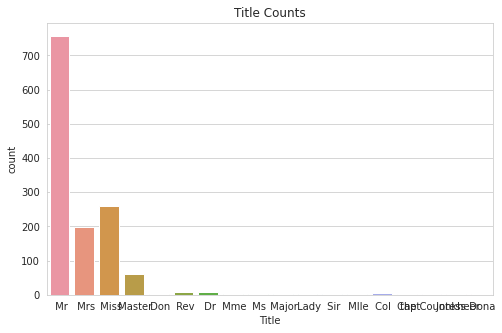

In [36]:
# Create title feature out of name feauture
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0])

# remove Name
df.drop('Name', axis=1, inplace=True)

plt.figure(figsize=(8, 5))
ax = sns.countplot(df['Title'])
ax.set_title('Title Counts')
plt.show()

As some titles are very rare, let's create a new value for title called 'rare' and add all rare titles. See the cell bellow.

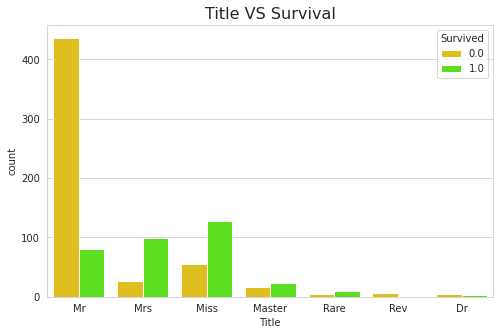

In [37]:
# ---
df['Title'] = df['Title'].apply(lambda x: x.strip() if x.strip() in ['Mr', 'Mrs', 'Miss', 'Master', 'Dr', 'Rev'] else 'Rare')

plt.figure(figsize=(8, 5))
sns.set_palette('hsv')
ax = sns.countplot(df['Title'], hue=df['Survived'])
ax.set_title('Title VS Survival', fontdict={'fontsize':16})
plt.show()

**3.1.2- Create Fsize(family size) feature**

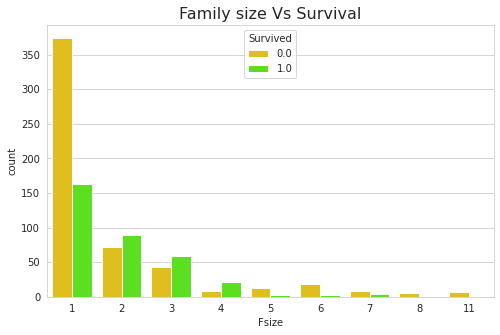

In [38]:
# create Fsize feature from SibSp, Parch features
df['Fsize'] = df['SibSp'].add(df['Parch']) + 1

plt.figure(figsize=(8, 5))
sns.set_palette('hsv')
ax = sns.countplot(df['Fsize'], hue=df['Survived'])
ax.set_title('Family size Vs Survival', fontdict={'fontsize':16})
plt.show()

**3.1.3- Create IsAlone feature**

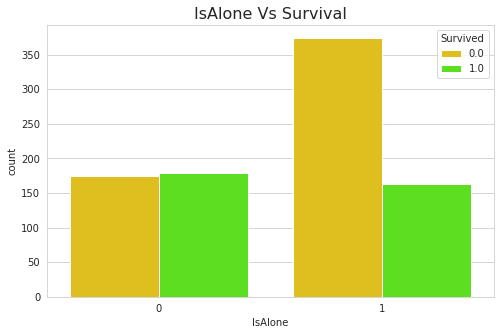

In [39]:
# create IsAlone out of family size
df['IsAlone'] = df['Fsize'].apply(lambda x: 1 if x == 1 else 0)


plt.figure(figsize=(8, 5))
sns.set_palette('hsv')
ax = sns.countplot(df['IsAlone'], hue=df['Survived'])
ax.set_title('IsAlone Vs Survival', fontdict={'fontsize':16})
plt.show()

**3.1.4- Create TicketPrefix feature**

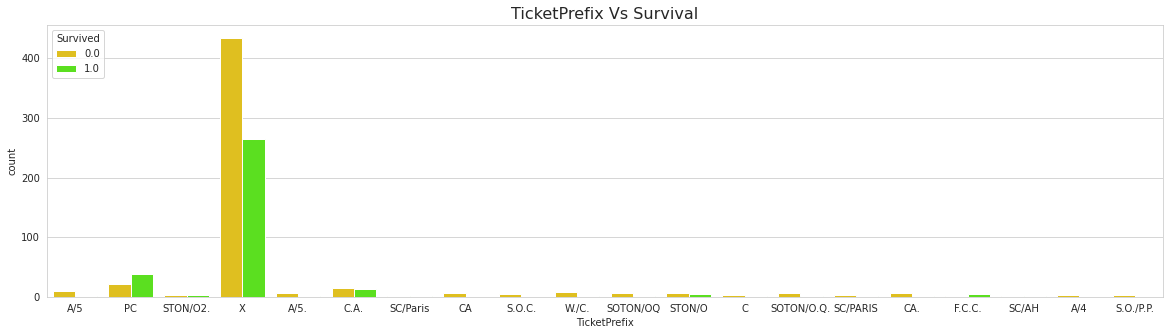

In [40]:
# Ticket
# Get Ticket prefixes and add them as a new feature since it seems they are of importance

def get_prefix(x):
    # return prefix if prefix is not a number else return 'X'
    pre = x.split(' ')[0]
    if not pre.isnumeric():
        return pre
    return 'X'

df['TicketPrefix'] = df['Ticket'].apply(get_prefix)

tp_count = df['TicketPrefix'].value_counts()
# change prefixes with a frequency of less than 5 to 'X'
df['TicketPrefix'] = df['TicketPrefix'].apply(lambda x: x if  tp_count[x] > 4 else 'X')

# remove Ticket
df.drop('Ticket', axis=1, inplace=True)

# viualize it
plt.figure(figsize=(20, 5))
sns.set_palette('hsv')
ax = sns.countplot(df['TicketPrefix'], hue=df['Survived'])
ax.set_title('TicketPrefix Vs Survival', fontdict={'fontsize':16})
plt.show()

In [41]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Fsize,IsAlone,TicketPrefix
PassengerId,,,,,,,,,,,,
1,0.0,3,male,22.0,1,0,7.2500,S,Mr,2,0,A/5
2,1.0,1,female,38.0,1,0,71.2833,C,Mrs,2,0,PC
3,1.0,3,female,26.0,0,0,7.9250,S,Miss,1,1,STON/O2.
4,1.0,1,female,35.0,1,0,53.1000,S,Mrs,2,0,X
5,0.0,3,male,35.0,0,0,8.0500,S,Mr,1,1,X


----------------------------------

<a id='3-2'></a>
<h3 style='text-align: center;background: black;color: white;border-radius: 15px; padding: 10px'>
    3.2- Encoding Categorical Variables
</h3>

In [42]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'Fsize', 'IsAlone', 'TicketPrefix'],
      dtype='object')

In [43]:
# encode categorical to numeric features
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

df['Embarked'] = df['Embarked'].map({
    'C': 0,
    'Q': 1,
    'S': 2
})

df['TicketPrefix'] = df['TicketPrefix'].map({
    'X': 0,
    'PC': 1,
    'C.A.': 2,
    'SOTON/O.Q.': 3,
    'STON/O': 4,
    'W./C.': 5,
    'A/5': 6,
    'CA.': 7,
    'SC/PARIS': 8,
    'A/5.': 9,
    'CA': 10,
    'F.C.C.': 11,
    'SOTON/OQ': 12,
    'C': 13,
    'S.O.C.': 14, 
    'STON/O2.': 15,
    'S.O./P.P.': 16,
    'A/4': 17,
    'SC/Paris': 18,
    'SC/AH': 19,
})

df['Title'] = df['Title'].map({
    'Mr': 0,
    'Miss': 1,
    "Mrs": 2,
    'Master': 3,
    'Rare': 4,
    'Dr': 5,
    'Rev': 6,
})

In [44]:
df.dtypes

Survived        float64
Pclass            int64
Sex               int64
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked          int64
Title             int64
Fsize             int64
IsAlone           int64
TicketPrefix      int64
dtype: object

All features are of data type 'int' or 'float'

In [45]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Fsize,IsAlone,TicketPrefix
PassengerId,,,,,,,,,,,,
1,0.0,3,1,22.0,1,0,7.2500,2,0,2,0,6
2,1.0,1,0,38.0,1,0,71.2833,0,2,2,0,1
3,1.0,3,0,26.0,0,0,7.9250,2,1,1,1,15
4,1.0,1,0,35.0,1,0,53.1000,2,2,2,0,0
5,0.0,3,1,35.0,0,0,8.0500,2,0,1,1,0


---

In [46]:
df_ = df.copy()

In [47]:
# split the dataset back to train and test data frames
train_df = df_.iloc[:train_df.shape[0]]
test_df = df_.iloc[train_df.shape[0]:].drop('Survived', axis=1)

<a id='4'></a>
<h2 style='text-align: center;background: black;color: white;border-radius: 10px; padding: 15px'>
    4- Modeling
    </h2>

<a id='4-1'></a>
<h3 style='text-align: center;background: black;color: white;border-radius: 15px; padding: 10px'>
    4.1- Simple modeling
    </h3>

Here we will first train some simple classification models and see how they perform by ploting their accuracy scores, and then we will walk through ensemble modeling to see how powerful it is.

In [48]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

X = train_df.drop('Survived', axis=1)
y = train_df['Survived'].astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=10)

**Simple modeling:**<br>
In this part, we will compare the following algorithms:
- Logistic regression
- SVM
- Random forest
- GradientBoostingClassifier
- AdaBoost
- Extratrees
- KNN

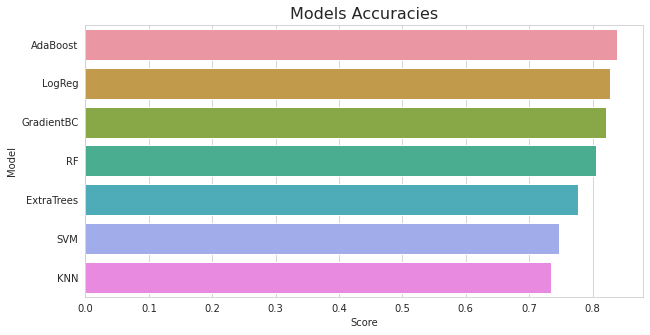

In [49]:
# import them
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# create a list to store classifiers
classifiers = []

# append classifiers
classifiers.append(LogisticRegression())
classifiers.append(SVC(probability=True))
classifiers.append(RandomForestClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(AdaBoostClassifier())
classifiers.append(ExtraTreesClassifier())
classifiers.append(KNeighborsClassifier())

models = []
for classifier in classifiers:
    model = classifier.fit(X_train, y_train)
    models.append(model)

    
pred_scores = []
for model in models:
    score = model.score(X_test, y_test)
    pred_scores.append(score)

pred_scores = pd.DataFrame({
    'Model': ['LogReg', 'SVM', 'RF', 'GradientBC',  'AdaBoost', 'ExtraTrees', 'KNN'],
    'Score': [round(i, 4) for i in pred_scores]
})

pred_scores = pred_scores.sort_values(by='Score', ascending=False)

# visualize the scores
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=pred_scores, x='Score', y='Model')
ax.set_title('Models Accuracies', fontdict={'fontsize': 16})
plt.show()

You can see that **AdaBoosting**, **Logistic Regression** and **GradientBC** perform better that the others with an accuracy of over 80%

<a id='4-2'></a>
<h3 style='text-align: center;background: black;color: white;border-radius: 15px; padding: 10px'>
    4.2- Ensemble modeling
    </h3>

In this part, we will use ensemble modeling, a.k.a ensemble learning, to reinforce the performance of our model. **Ensemble modeling** is the mechanism of combining a group of weak learners so as to gain better performance.<br>
In this particular notebook, I chose **Random Forest, Extra Trees, AdaBoosting, GradientBoosting and SVC** as base learners or first level models.<br>

I will first use GridSearchCV to find the best estimators of the desired classifiers (referred to as ***Hyperparameter tuning***), then use **KFold prediction** to predict the target variables on train and test sets, and finally use XGBoost classifier to finalize our model. XGB classifier is used for ***stacking*** which is using predictions of base classifiers as input for training to a second-level model.

In [50]:
# split the training set into X and y
X = train_df.drop('Survived', axis=1)
y = train_df['Survived'].astype('int')

# just to remind you
test_df = test_df # test set of the competition

**Note** that running cell bellow may take some time

**Hyperparameter** tuning using GridSearch

In [51]:
# Find the best kinds of classifiers using GridSearchCV
# import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

# Define parameters for our classifiers
SEED = [10]

# Random Forest
rf_params = {
    'n_estimators': [5, 50, 100, 250,500],
    'min_samples_split': [2, 16, 32],
    'random_state': SEED,
    "max_depth": [None],
    "min_samples_leaf": [1, 3, 10],
    "bootstrap": [False],
    "criterion": ["gini"]
}

# Extra Trees 
et_params = {
    'n_estimators':[5, 50, 100, 250, 500],
    'random_state': SEED,
    "max_depth": [None],
    'min_samples_split': [2, 16, 32],
    "min_samples_leaf": [1, 3, 10],
    "bootstrap": [False],
    "criterion": ["gini"]
}

# AdaBoost 
ada_params = {
    'n_estimators': [5, 50, 100, 250, 500],
    'learning_rate' : [0.001, 0.01, 0.5, 0.75, 1.],
    "algorithm" : ["SAMME","SAMME.R"],
    'random_state': SEED,
}

# Gradient Boosting 
gb_params = {
    'n_estimators': [5, 50, 100, 250, 500],
    'max_depth': [2, 3, 4, 5, 6, 7],
    'min_samples_split': [2, 16, 32],
    'min_samples_leaf': [100,150],
    'learning_rate' : [.001, .05, .75, .1, .5],
    'random_state': SEED,
    'loss' : ["deviance"],
    'max_depth': [4, 8],
}

# SVC
svc_params = {
    'kernel': ['rbf'], 
    'gamma': [ 0.001, 0.01, 0.1, 1],
    'C': [1, 10, 50, 100,200,300, 1000]
}

"""
    some of params of GridSearchCV: param_grid usually takes a dictionary containing different values for different parameters of
    the model we pass in, verbose says wether or not (or howmany outputs) you want to see any outputs during the training.
    n_jobs is to indicate how many processors should be used. (all processors if passed -1)
"""
# Initialize GridSearches
gs_rf = GridSearchCV(RandomForestClassifier(), param_grid=rf_params, scoring='accuracy', verbose=0, n_jobs=-1)
gs_rf.fit(X, y)

gs_et = GridSearchCV(ExtraTreesClassifier(), param_grid=et_params, scoring='accuracy', verbose=0, n_jobs=-1)
gs_et.fit(X, y)

gs_ada = GridSearchCV(AdaBoostClassifier(), param_grid=ada_params, scoring='accuracy', verbose=0, n_jobs=-1)
gs_ada.fit(X, y)

gs_gb = GridSearchCV(GradientBoostingClassifier(), param_grid=gb_params, scoring='accuracy', verbose=0, n_jobs=-1)
gs_gb.fit(X, y)

gs_svc = GridSearchCV(SVC(probability=True), param_grid=svc_params, scoring='accuracy', verbose=0, n_jobs=-1)
gs_svc.fit(X, y)


print('Training completed and best estimators found!')

Training completed and best estimators found!


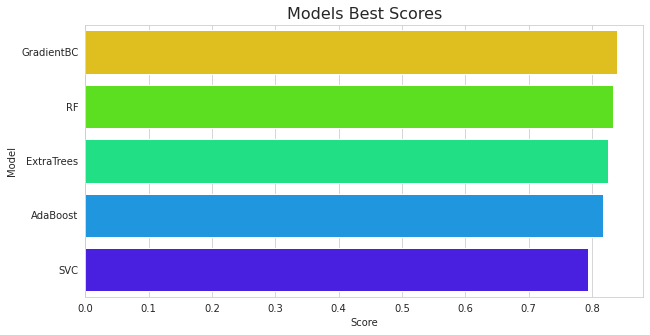

In [52]:
# Visualize the best scores for each classifier
pred_scores = pd.DataFrame({
    'Model': ['RF', 'GradientBC',  'AdaBoost', 'ExtraTrees', 'SVC'],
    'Score': [gs_rf.best_score_, gs_gb.best_score_, gs_ada.best_score_, gs_et.best_score_, gs_svc.best_score_]
})

pred_scores = pred_scores.sort_values(by='Score', ascending=False)

# visualize the scores
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=pred_scores, x='Score', y='Model')
ax.set_title('Models Best Scores', fontdict={'fontsize': 16})
plt.show()

Now that we discovered the best estimators, we will use them to do KFold predictions in order to generate the base-predictions, so that we can then use it to feed xgb classifer as the final step.

In [53]:
# Get out-of-fold function
from sklearn.model_selection import KFold

NFOLDS = 5
kf = KFold(n_splits=NFOLDS, shuffle=False)
def get_oof(clf, X, y, test_df):
    '''
        returns train and test out-of-fold predictions
    ''' 
    oof_train = np.zeros((X.shape[0],))
    oof_test = np.zeros((test_df.shape[0],))
    oof_test_skf = np.empty((NFOLDS, test_df.shape[0]))

    for i, (train_index, test_index) in enumerate(kf.split(X)):
        X_tr = X[train_index]
        y_tr = y[train_index]
        X_te = X[test_index]
        
        clf.fit(X_tr, y_tr)
        
        oof_train[test_index] = clf.predict(X_te)
        oof_test_skf[i, :] = clf.predict(test_df)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [54]:
# lets get out of kfold predictions using the above-defined function
oof_rf_train, oof_rf_test = get_oof(gs_rf.best_estimator_, X.values, y.ravel(), test_df)
oof_et_train, oof_et_test = get_oof(gs_et.best_estimator_, X.values, y.ravel(), test_df)
oof_ada_train, oof_ada_test = get_oof(gs_ada.best_estimator_, X.values, y.ravel(), test_df)
oof_gb_train, oof_gb_test = get_oof(gs_gb.best_estimator_, X.values, y.ravel(), test_df)
oof_svc_train, oof_svc_test = get_oof(gs_svc.best_estimator_, X.values, y.ravel(), test_df)

**Well,**<br >
Let's now create a new dataset containing the train and test results from the above-found best estimators. We will use the dataset to train our final model.

In [55]:
# training set for xgb
base_predictions_train = {
    'Random Forest': oof_rf_train.ravel(), # e.g. [0., 1., 0., 0. ,0.]
    'Extra Trees': oof_et_train.ravel(),
    'AdaBoosting': oof_ada_train.ravel(),
    'GradientBoosting': oof_gb_train.ravel(),
    'SVC': oof_svc_train.ravel(),
    
    'Survived': y.ravel()
}

# testing set for xgb
base_predictions_test = {
    'Random Forest': oof_rf_test.ravel(), # e.g. [0., 1., 0., 0. ,0.]
    'Extra Trees': oof_et_test.ravel(),
    'AdaBoosting': oof_ada_test.ravel(),
    'GradientBoosting': oof_gb_test.ravel(),
    'SVC': oof_svc_test.ravel(),
}

training_set = pd.DataFrame(base_predictions_train)
test_set = pd.DataFrame(base_predictions_test)

training_set.sample(5)

,Random Forest,Extra Trees,AdaBoosting,GradientBoosting,SVC,Survived
429,0.0,0.0,0.0,0.0,0.0,1
537,1.0,1.0,1.0,1.0,1.0,1
724,0.0,0.0,1.0,0.0,1.0,1
473,1.0,1.0,1.0,1.0,1.0,1
124,0.0,0.0,0.0,0.0,1.0,0


In [56]:
# train xgb classifier
from xgboost import XGBClassifier
X = training_set.drop('Survived', axis=1)
y = training_set['Survived']


xgb = XGBClassifier(
    n_estimators= 2000
)
    
xgb.fit(X, y)

print('Training completed!')

Training completed!


In [57]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier


bg = BaggingClassifier(n_estimators=500)
bg.fit(X, y)

BaggingClassifier(n_estimators=500)

<a id='5'></a>
<h2 style='text-align: center;background: black;color: white;border-radius: 10px; padding: 10px'>
    5- Prediction and Submission
    </h2>

In [58]:
# predict
predictionsXGB = xgb.predict(test_set)

submission = pd.DataFrame({
    "PassengerId": test_df.index,
    "Survived": predictionsXGB
})
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [59]:
submission.to_csv('./submission.csv', index=False)
print('Submitted!')

Submitted!


<h2 style='background: black;color: white;border-radius: 10px; text-align: center; padding: 80px;font-size: 32px'>
    Thank you 🙌🥰
    </h2>